In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
#twitter API keys . for convenience they are listed here i/o in config file
consumer_key = "FQ77UMLjKRgcoFSyTASzwixnI"
consumer_secret = "1qVi8JYhEUU3xAWVnrL99AUznEWOIuQWKZH8J1KkxWjtC24qL0"
access_token = "969400125805047808-yAN8pR7wneqdTr3CW4of1651vJmU5IV"
access_token_secret = "vuxPy8mfIk3XcIUPoczSFUAfgvEtaQNpZ1q843miRPNJ3"


In [3]:
#setup tweepy authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#create a list that we will loop through to get tweets
newslist = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTIMES"]
#set counter to 0
counter = 0
#create an empty list for sentiment we will append to
sentiments = []


In [5]:
#loop through each twitter account in newlist and run vader analysis on each tweet, adding each tweet

for account in newslist:
    public_tweets = api.user_timeline(account, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = tweetnumber
        sentiments.append({"Outlet": account,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber = tweetnumber + 1
        counter = counter + 1
        

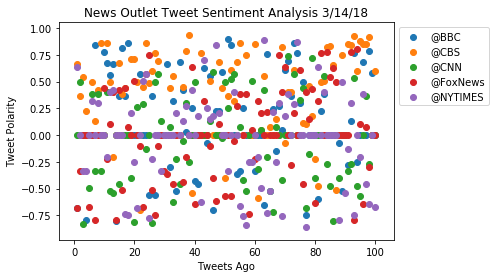

In [6]:
#create dataframe from appended data in sentiments
sentDF = pd.DataFrame.from_dict(sentiments)

#loop through each twitter account in our new list and plot compound value 
for newsaccount in newslist:
    plotdf = sentDF[sentDF["Outlet"] == newsaccount]
    xaxis = plotdf["Tweet Count"]
    yaxis = plotdf["Compound"]
    plt.scatter(xaxis,yaxis, label = newsaccount)
plt.legend(bbox_to_anchor=(1,1))
plt.title("News Outlet Tweet Sentiment Analysis 3/14/18")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Sentiment Analysis %s.png" % datetime.today().strftime('%Y%m%d'), bbox_inches='tight')
plt.show()

In [7]:
# for bar graph get average compound sentiment for each twitter account
XSent = sentDF.groupby("Outlet")['Compound'].mean()
XSentdf = pd.DataFrame(XSent)
XSentdf


,Compound
Outlet,
@BBC,0.120711
@CBS,0.339327
@CNN,-0.034003
@FoxNews,0.004874
@NYTIMES,-0.037576


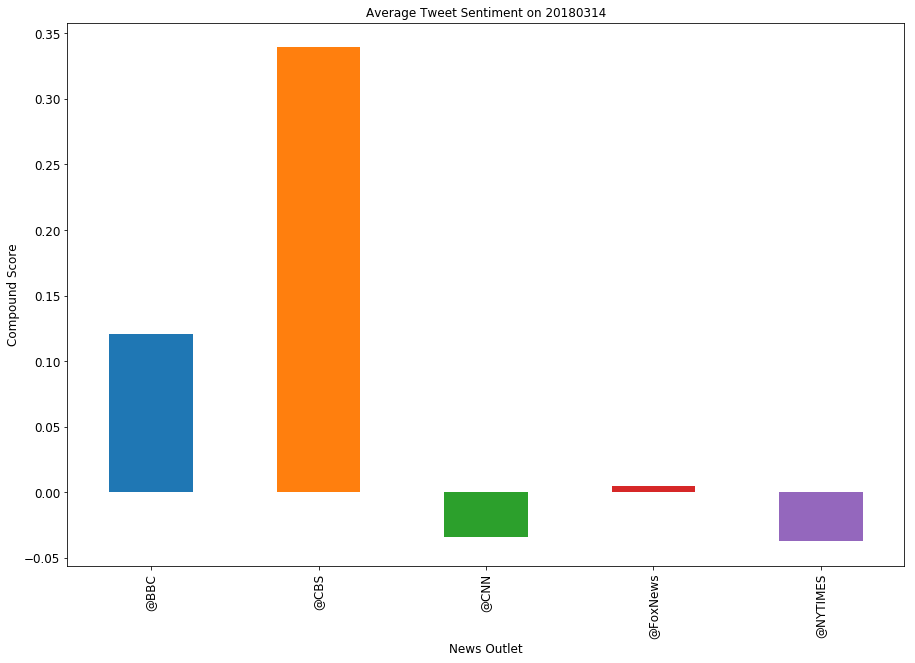

In [10]:
ax = XSentdf["Compound"].plot(kind='bar', title ="Average Tweet Sentiment on %s" % datetime.today().strftime("%Y%m%d"), figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("News Outlet", fontsize=12)
ax.set_ylabel("Compound Score", fontsize=12)
plt.savefig("Average Tweet Sentiment %s.png" % datetime.today().strftime('%Y%m%d'), bbox_inches='tight')
plt.show()

In [11]:
sentDF.to_csv('tweet_sentiments.csv')

## ANALYSIS

In [ ]:
#@CBS has the most positive tweet sentiment by a significant margin. 
#The only negative sentiment accounts are the NY Times and CNN
# Overall, sentiment is positive if all 5 accounts are combined....on the whole more positive tweets than neutral or negative across all 500 tweets analyzed
